# TP2: Interpolação Polinomial e Regressão Polinomial

Nome: *escreva seu nome aqui*

Matrícula: *escreva sua matrícula aqui*

**Ao submeter este trabalho prático, eu, aluno, declaro que aceito a seguinte política de honestidade com relação ao plágio: "O aluno que submeter soluções com mais que 40% das linhas similares a outra submissão ficará com zero neste trabalho prático. As soluções enviadas também serão comparadas com sumissões de semestres anteriores."**

* Data de entrega: até 23:59 do dia 09/10/2018

* As questões não podem ser discutidas entre alunos *em hipótese alguma*. Dúvidas devem ser tiradas com os monitores ou com o professor.

* Todo material consultado na Internet deve ser referenciado (incluir URL).

* Submissão deve ser feita em formato de ipython notebook (extensão .ipynb) através do Moodle.

Este trabalho está dividido em quatro partes:

* **Parte 0**: Apresentação das técnicas vistas em sala
* **Parte 1**: Polinômio de Gregory-Newton
* **Parte 2**: Estudo do erro, interpolação vs. regressão
* **Parte 3**: Estudo do tempo de execução, interpolação vs. regressão

## Parte 0: Apresentação das técnicas vistas em sala

**Interpolação Polinomial:** a seguir apresentamos as implementações dos métodos de Newton e Lagrange, vistos em sala.

In [2]:
import numpy as np

def PolinomioNewton(x, y, z):
    m = len(x)
    Delta = np.zeros((m,m))
    Delta[:,0] = y
    for j in range(1,m):
        for i in range(m-j):
            Delta[i,j] = (Delta[i+1,j-1] - Delta[i,j-1])/(x[i+j]-x[i])
    
    # com Processo de Horner
    soma = 0.0
    for j in range(m-1,0,-1):
        soma += Delta[0,j]
        soma *= (z-x[j-1])
    soma += y[0]
        
    return soma

In [3]:
def PolinomioLagrange(x, y, z):
    m = len(x)
    soma = 0
    for i in range(m):
        prod = y[i]
        for j in range(m):
            if j != i:
                prod *= (z-x[j])/(x[i]-x[j])
        soma += prod
        
    return soma

In [4]:
# Exemplo de uso

x = 1.0*np.array([3,5,6])
y = 1.0*np.array([-8,-3,4])

print('Interpolacao de Newton:',PolinomioNewton(x,y,4))
print('Interpolacao de Lagrange:',PolinomioLagrange(x,y,4))

Interpolacao de Newton: -7.0
Interpolacao de Lagrange: -7.0


**Regressão Polinomial**: a seguir apresentamos a implementação da regressão polinomial usando o métodos dos mínimos quadrados.

A seguir apresentamos a implementação um gerador de polinômios aleatórios. Mais precisamente, iremos escrever uma função que retorna $p+1$ números aleatórios independentes e com distribuição uniforme entre -5 e 5. Para isto, usamos a função np.random.rand. Tendo em vista que esta função do numpy gera valores em $[0,1)$, iremos transformá-los de maneira a mapeá-los para o intervalo $[-5,5)$.

In [5]:
def RegressaoPolinomial_getX(x,t):
    n = len(x)
    X = np.empty((n,t+1))
    X[:,0] = 1
    X[:,1] = x
    for i in range(2,t+1):
        X[:,i] = X[:,i-1]*x
    return X

In [7]:
exemplo_x = np.array([1.2,2.5,3.0,4.1,6.2,7.1,8.8,9.5])
exemplo_y = np.array([6.8,6.1,9.9,9.7,12.1,17.9,18.0,21.5])

exemplo_X = RegressaoPolinomial_getX(exemplo_x,2)
beta, residuals, rank, sing_vals = np.linalg.lstsq(exemplo_X,exemplo_y,rcond=-1)
print('Os coeficientes de y = beta_0 + beta_1 x + beta_2 x^2 são:',beta)

Os coeficientes de y = beta_0 + beta_1 x + beta_2 x^2 são: [ 5.31559127  0.74500242  0.09614938]


**Geração de dados sintéticos:** A seguir apresentamos duas funções para gerar tabelas de pontos $(x,y)$ **com erros de medição em $y$**, a partir da avaliação de um polinômio. Vamos assumir que os coeficientes são dados em ordem crescente de grau. Para isso, usaremos a função np.polyval que avalia, em um ponto $x$, um polinômio cujos coeficientes são fornecidos em ordem *decrescente*. Este valor será somado a um erro aleatório cuja distribuição é Normal com média 0 e desvio padrão 0.1, usando a função np.random.normal.

Na primeira função, as abcissas são igualmente espaçadas entre $x_1 = 0$ e $x_n=1$.

Na segunda função, $x_1 = 0$, $x_n = 1$ e o restante das abcissas são escolhidas independentemente de maneira uniforme aleatória no intervalo $[0,1)$.

In [8]:
def geraPolinomioAleatorio(p):
    return -5+10*np.random.rand(p+1)

In [9]:
geraPolinomioAleatorio(3)

array([ 1.35322908,  2.20664926, -1.08621329, -3.10428133])

In [10]:
def geraTabelaAleatoriaY(n, coef):
    x = np.linspace(0,1,n)
    y = np.polyval(coef[::-1],x) + np.random.normal(scale=0.1,size=n)
    return x,y

In [11]:
def geraTabelaAleatoriaXY(n, coef):
    x = np.array([0.0] + list(np.random.rand(n-2)) + [1.0])
    y = np.polyval(coef[::-1],x) + np.random.normal(scale=0.1,size=n)
    return x,y

In [12]:
# Exemplo de uso
coef = geraPolinomioAleatorio(3)
x, y = geraTabelaAleatoriaXY(11,coef)
print(x,y)

[ 0.          0.1282869   0.03770905  0.2236796   0.41783091  0.16141654
  0.64979336  0.03931042  0.61304674  0.91835477  1.        ] [  0.66313665   1.15022938   0.91525434   1.54381829   2.66776412
   1.35320659   5.32039817   0.96580375   4.74989818   9.52881362
  10.98397833]


## Parte 1: Interpolação de Gregory-Newton

A Interpolação de Gregory-Newton é uma variação da Interpolação de Newton que pode ser utilizada quando as abscissas são igualmente espaçadas: $x_0, x_1 = x_0 + h, x_2 = x_0 + 2h, \ldots, x_n = x_0 + nh$.

Por exemplo, $x_0 = 0.0, x_1 = 0.2, x_2 = 0.4, \ldots, x_n = 1.0$, onde $h = 0.2$.

O operador utilizado na interpolação de Gregory-Newton é a diferença finita (e não a diferença dividida), definida como
$$
\Delta^j y_i = \Delta^{j-1} y_{i+1} - \Delta^{j-1} y_i, \quad j=1,\ldots,n,
$$
onde $\Delta^0 y_i = y_i$.

A partir da relação entre os operadores de diferença dividida $\omega (x_i,\ldots, x_{i+j})$ e de diferença finita $\Delta^j y_i$
$$
    \omega (x_i,\ldots, x_{i+j}) = \frac{\Delta^j y_i}{j! h^j},
$$
é fácil mostrar que o polinômio interpolador é dado por
$$
P_n(x) = y_0 + \sum_{j=1}^n \frac{\Delta^j y_0}{j!} \prod_{k=0}^{j-1} (u_x - k),
$$
onde $u_x = (x-x_0)/h$.

A grande vantagem em relação à Interpolação de Newton é que ela reduz o número de adições pela metade e o número de divisões cai de $(n^2+n)/2$ para $n+1$.

**1.1** Modifique a implementação do Polinômio de Newton (copiada abaixo) para implementar a Interpolação de Gregory-Newton. (Dica: você precisa usar o Processo de Horner para ganhar a pontuação total da questão). 

In [52]:
import numpy as np

def PolinomioGregoryNewton(x, y, z):
    m = len(x)
    h = x[1]-x[0]
    
    m = len(x)
    Delta = np.zeros((m,m))
    Delta[:,0] = y
    for j in range(1,m):
        for i in range(m-j):
            # modificar linha seguinte
            Delta[i,j] = (Delta[i+1,j-1] - Delta[i,j-1])/(x[i+j]-x[i])
    
    # com Processo de Horner
    # calcular u_x
    u_x = 
    soma = 0.0
    for j in range(m-1,0,-1):
        soma += Delta[0,j]
        # modificar linha seguinte
        soma *= (z-x[j-1])
    soma += y[0]            
    return soma

In [53]:
# Exemplo de uso

x = 1.0*np.array([110,120,130])
y = 1.0*np.array([2.041,2.079,2.114])

print('Interpolacao de Newton:',PolinomioNewton(x,y,115))
print('Interpolacao de Lagrange:',PolinomioLagrange(x,y,115))
print('Interpolacao de Lagrange:',PolinomioGregoryNewton(x,y,115))

Interpolacao de Newton: 2.060375
Interpolacao de Lagrange: 2.060375
Interpolacao de Lagrange: 2.060375


## Parte 2: Estudo do erro, interpolação vs. regressão

Nesta parte, iremos usar a Interpolação e de estimação de mínimos quadrados para avaliar o erro de previsão quando há erros de medição. Iremos investigar as seguintes questões:

* O que acontece com o erro de interpolação quando aumentamos o grau do polinômio?
* O que acontece com o erro da regressão polinomial quando aumentamos o número de pontos?
* Dado um polinômio de grau $n$, qual dos métodos retorna as melhores previsões?

**2.1** Antes de mais nada, precisamos definir uma função que fará a escolha de pontos.

**Entrada:** um vetor $x$, uma abscissa $z$ e o número de pontos $n$ a serem escolhidos.

**Saída:** Sejam $i$ e $j$ o menor e o maior índice dos pontos que devem ser usados como pontos-base. A função deve retornar $i$ e $j+1$.

Você pode assumir que as coordenadas de $x$ estão em ordem estritamente crescente e que $x[0] < z < x[-1]$. Usaremos a função numpy.searchsorted.

In [13]:
def escolhePontos(x,z,n):
    right_pos = np.searchsorted(x,z)
    left_pos = right_pos-1
    
    xlen = len(x)
    while (right_pos - left_pos +1) < n:
        if right_pos == :
            left_pos =
            break
        if left_pos == :
            right_pos =
            break
        if :
            right_pos += 1
        else:
            left_pos -= 1
    return left_pos, right_pos+1

In [14]:
# Exemplo de uso
print(escolhePontos([0,1,3,5,6],4,3))
print(escolhePontos([0,1,3,5,6],0.5,3))
print(escolhePontos([0,1,3,5,6],1.5,2))
print(escolhePontos([0,1,3,5,6],5.5,4))
print(escolhePontos([0,1,2,3,4,5],1.5,4))

(2, 5)
(0, 3)
(1, 3)
(1, 5)
(0, 4)


**2.2** O que acontece com o erro de interpolação quando aumentamos o grau do polinômio?
Para responder esta pergunta, vamos:
* gerar um polinômio de grau $p=4$ com coeficientes $\textrm{coef}$ (usar função apropriada da Parte 0),
* gerar uma tabela com $n=30$ pontos igualmente espaçados em $[0,1)$ a partir de $\textrm{coef}$ (usar função apropriada da Parte 0),
* gerar um vetor z_vec contendo as $\textrm{ntests}=1000$ abscissas aleatórias em $[0,1]$ dos pontos a serem aproximados,
* para cada grau $t=2,\ldots,p+4$:
    * para cada $z_i$ em z_vec:
        -  fazendo a escolha de pontos, usar interpolação de Newton de grau $t$ para obter $y_i^\textrm{aprox}$, uma aproximação para a ordenada de $z_i$
        - calcular o erro quadrático da aproximação, i.e. $(y_i^\textrm{exato}-y_i^\textrm{aprox})^2$
    * calcular o erro quadrático médio da aproximação por polinômio de grau $t$:
    $$
      \textrm{erro}_t = \frac{1}{\textrm{ntests}} \sum_{i=1}^{\textrm{ntests}} y_i^\textrm{exato}-y_i^\textrm{aprox}
    $$
    
**Atenção:** o gráfico gerado ao final deste processo pode ser um pouco diferente para cada execução.

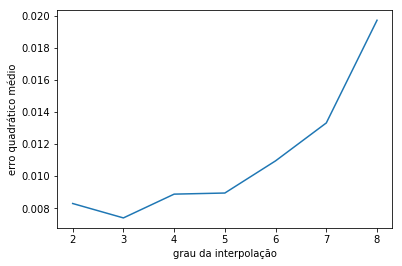

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

p = 4
n = 30
ntests = 1000

# gera coeficientes do polinomio
coef =

# gera tabela de n pontos
x,y =

# gera abscissas aleatorias (casos de teste)
z_vec =
y_exato = np.polyval(coef[::-1],z_vec)

erros = np.zeros(p+3)
for t in range(2,p+5):
    for i in range(ntests):
        z =
        l_ind,r_ind = escolhePontos(x, z, t+1)
        # preencher indices na linha seguinte
        y_aprox = PolinomioNewton(x[:], y[:], z)
        erros[t-2] +=
    erros[t-2] /= ntests

fig = plt.figure()
fig.add_subplot(111)
plt.plot(np.arange(2,p+5),erros)
plt.xlabel('grau da interpolação')
plt.ylabel('erro quadrático médio')

**2.3** O que acontece com o erro da regressão polinomial quando aumentamos o número de pontos dados?

Agora iremos fixar o grau da regressão polinomial $t=2,4, \ldots, p+4$ e aumentar o número de pontos $m=t+1,\ldots,t+20$ usados para estimar os parâmetros.

Os pontos serão escolhidos aleatoriamente dentre aqueles no vetor $x$ gerado na questão anterior. Além disso, é interessante que a estimação feita com $m=t+i$ pontos inclua todos os pontos usados na estimação feita com $m-1$ pontos. Uma forma de se satisfazer ambos os requisitos isto é embaralhar os vetores $x$ e $y$ e usar sempre os $m$ primeiros elementos.

**Atenção:** o gráfico gerado ao final deste processo pode ser um pouco diferente para cada execução.

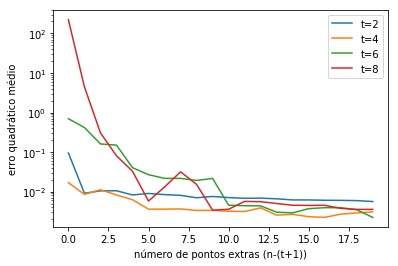

In [26]:
inds = np.arange(n)
np.random.shuffle(inds) # indices embaralhados
x_shuffled =
y_shuffled =

X_shuffled = RegressaoPolinomial_getX(x_shuffled,p+4)

fig = plt.figure()
fig.add_subplot(111)
for t in range(2,p+5,2):
    erros = np.zeros(20)
    for m in range(t+1,t+21):
        # preencher os indices na linha seguinte
        beta, _, _, _ = np.linalg.lstsq(X_shuffled[:,:],y_shuffled[:],rcond=-1)
        y_aprox = np.polyval(beta[::-1],z_vec)
        # preencher argumento de np.average()
        erros[m-(t+1)] = np.average()
        
    # plotar os resultados para grau t
    plt.semilogy(np.arange(0,20),erros,label='t={}'.format(t))
    plt.xlabel('número de pontos extras (n-(t+1))')
    plt.ylabel('erro quadrático médio')
    plt.legend()

**2.4** Dado um polinômio de grau $t=2,\ldots,p+4$, qual dos métodos retorna as melhores previsões?

Para responder esta pergunta, iremos repetir o experimento anterior, adicionando uma reta tracejada correspondente ao erro da interpolação para cada grau.

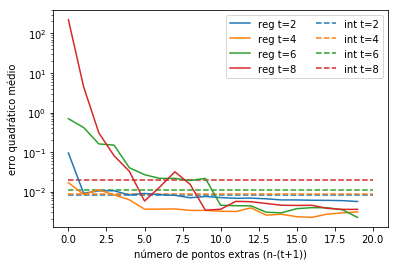

In [27]:
fig = plt.figure()
fig.add_subplot(111)
for t in range(2,p+5,2):
    erros = np.zeros(20)
    for m in range(t+1,t+21):
        # preencher os indices na linha seguinte
        beta, _, _, _ = np.linalg.lstsq(X_shuffled[:,:],y_shuffled[:],rcond=-1)
        y_aprox = np.polyval(beta[::-1],z_vec)
        # preencher argumento de np.average()
        erros[m-(t+1)] = np.average()

    y_interp = np.zeros(ntests)
    for i in range(ntests):
        z =
        l_ind, r_ind = escolhePontos(x,z,t+1)
        # preencher os indices na linha seguinte
        y_interp[i] = PolinomioNewton(x[:],y[:],z)
    # preencher argumento de np.average()
    erro_interp  = np.average()
          
    # plotar os resultados para grau t
    line = plt.semilogy(np.arange(0,20),erros,label='reg t={}'.format(t))
    plt.hlines(erro_interp,0,20,color=line[0].get_color(),linestyles='--',label='int t={}'.format(t))
    plt.xlabel('número de pontos extras (n-(t+1))')
    plt.ylabel('erro quadrático médio')
    plt.legend(ncol=2)

## Parte 3: Estudo do tempo de execução, interpolação vs. regressão

Vimos em sala que o custo da interpolação polinomial de grau $n$ é $\mathcal{O}(n^2)$ e que o custo para se construir as equações normais de uma regressão polinomial é $\mathcal{O}(np^2) = \mathcal{O}(n^3)$.

Contudo, tanto a interpolação polinomial quanto a regressão polinomial raramente consideram valores grandes de $n$, fazendo com que a diferença no custo computacional seja irrisória caso o método seja executado poucas vezes.

Nesta parte iremos medir o tempo de execução dos dois métodos variando $n$. Para isso, usaremos os métodos implementados nas bibliotecas numpy e scipy.

Vamos utilizar o comando mágico %timeit para medir o tempo de execução de cada um dos métodos. Consulte a [documentação do IPython](http://ipython.readthedocs.io/en/stable/interactive/magics.html) para ver o seu funcionamento. *Não confundir com o comando time*.

**3.1** Escolha os parâmetros do comando %timeit de modo a executar 4 vezes um loop com $10^3$ chamadas a PolinomioNewton(x, y, z). No bloco de código seguinte, faça o mesmo para a função np.linalg.lstsq.

In [28]:
# geracao da funcao y = P(x)

p = 4
coef = geraPolinomioAleatorio(p) 
x, y = geraTabelaAleatoriaY(p+1, coef)

# geracao do ponto a ser interpolado
z = np.random.rand()

# preencher depois do comando %timeit com os parametros -r e -n adequados
%timeit     np.polynomial.polynomial.polyfit(x,y,deg=len(x)-1)

127 µs ± 10.2 µs per loop (mean ± std. dev. of 4 runs, 1000 loops each)


In [29]:
X = RegressaoPolinomial_getX(x,len(x)-1)
# preencher depois do comando %timeit com os parametros -r e -n adequados
%timeit     np.linalg.lstsq(X,y)

58.8 µs ± 8.66 µs per loop (mean ± std. dev. of 4 runs, 1000 loops each)


**3.2** Gere um único gráfico mostrando o aumento do tempo de execução de cada um dos métodos com o aumento do número de pontos $n=4,\ldots,10$. Desta vez, execute 3 vezes um loop com $10^3$ interações para cada caso.

In [32]:
npontos = np.arange(5,12)
tempos_poly = np.zeros(len(npontos))
tempos_linreg = np.zeros(len(npontos))

for n in npontos:
    coef = geraPolinomioAleatorio(n-1)
    x, y = geraTabelaAleatoriaY(n, coef)
    X = RegressaoPolinomial_getX(x,len(x)-1)
    
    # preencher depois do comando %timeit com os parametros -r e -n adequados
    time_info = %timeit      -q -o # preencher depois do -o
    tempos_poly[n-5] = time_info.average   

    # preencher depois do comando %timeit com os parametros -r e -n adequados
    time_info = %timeit      -q -o  # preencher depois do -o
    tempos_linreg[n-5] = time_info.average

**3.3** Plote os tempos de execução obtidos em cada caso.

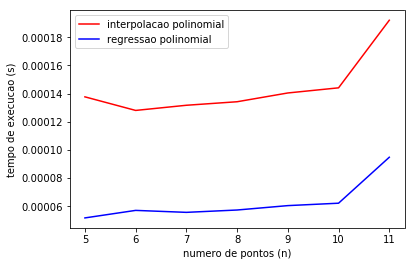

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

x = npontos
y1= 
y2= 


plt.legend()